In [1]:
import imageio
import matplotlib.pyplot as plt
from skimage import feature, img_as_float
import numpy as np

In [2]:
im = imageio.imread('CBC/Testing/Images/BloodImage_00339.jpg')
bg = imageio.imread('Results/BloodImage_blackground.jpg')

## Original Image

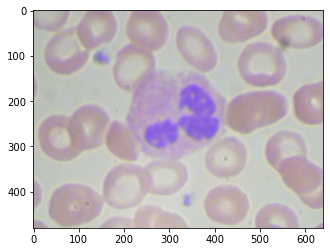

In [3]:
plt.imshow(im)


## Background Image
I had create a background image by extracting manually the background parts of the original image 

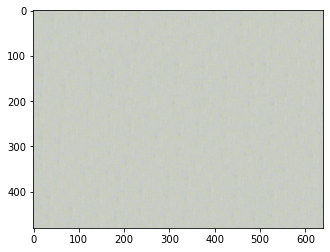

In [4]:
plt.imshow(bg)

In order to find egdes, i'm executing differents experiments like the next ones:


### Experiment 1 : 

The first one consists in subtract the original image with the background image in gray scale, in order to get the cells highlighted.


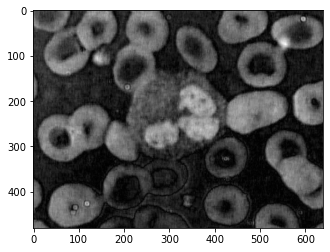

In [5]:
img_subt_g = np.abs(im.mean(axis=2)- bg.mean(axis=2))
plt.imshow(img_subt_g,cmap='gray')

## Experiment 2:

The next one consist like the before, but changes the result with a threshold. In this case, the threshold is 20. 

In [6]:
result = np.abs(im.mean(axis=2)- bg.mean(axis=2))
img_thrs_g = result.copy()
img_thrs_g[result>20] = 255 
img_thrs_g[result<20] = 0

plt.imshow(img_thrs_g,cmap='gray')

## Experiment 3: 

The next experiment consists in subtract the original image with the background image in red channel, in order to get the cells highlighted.

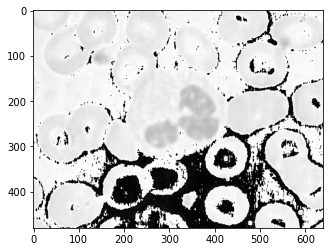

In [7]:
img_subt_r = im[:,:,0]- bg[:,:,0]
plt.imshow(img_subt_r,cmap='gray')

## Experiment 4:
The next one consist like the before, but changes the result with a threshold. In this case, the threshold is 20. 

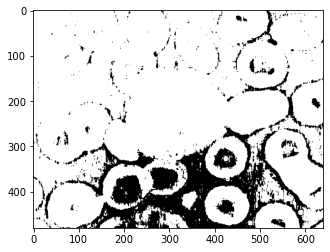

In [8]:
result = im[:,:,0]- bg[:,:,0]
img_subt_r_thrs = result.copy()
img_subt_r_thrs[result>20] = 255 
img_subt_r_thrs[result<20] = 0
plt.imshow(img_subt_r_thrs,cmap='gray')

## Experiment 5:
The next experiment consists in subtract the original image with the background image in green channel, in order to get the cells highlighted.

In [9]:
img_subt_gr = im[:,:,1]- bg[:,:,1]
plt.imshow(img_subt_gr,cmap='gray')

## Experiment 6:
The next one consist like the before, but changes the result with a threshold. In this case, the threshold is 20.

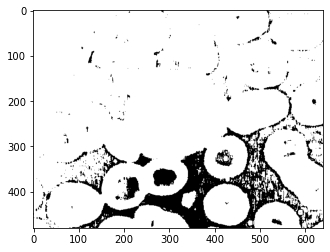

In [10]:
result = im[:,:,1]- bg[:,:,1]
img_subt_gr_thrs = result.copy()
img_subt_gr_thrs[result>20] = 255 
img_subt_gr_thrs[result<20] = 0
plt.imshow(img_subt_gr_thrs,cmap='gray')

## Experiment 7:
The next experiment consists in subtract the original image with the background image in blue channel, in order to get the cells highlighted.

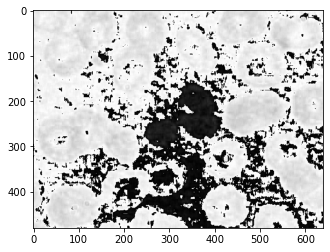

In [11]:
img_subt_b = im[:,:,2]- bg[:,:,2]
plt.imshow(img_subt_b,cmap='gray')

## Experiment 8:
The next one consist like the before, but changes the result with a threshold. In this case, the threshold is 20.

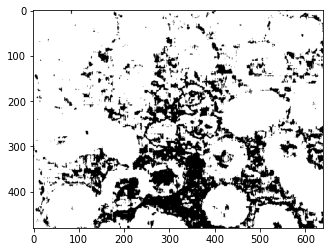

In [12]:
result = im[:,:,2]- bg[:,:,2]
img_subt_b_thrs = result.copy()
img_subt_b_thrs[result>20] = 255 
img_subt_b_thrs[result<20] = 0
plt.imshow(img_subt_b_thrs,cmap='gray')

## Experiment 9:
We applied a canny egdes detection to all previous experiments. With the sigma = 8

In [13]:
im_g_canny = img_as_float(img_thrs_g)
edgs_1 = feature.canny(im_g_canny,8)
im_r_canny = img_as_float(img_subt_r_thrs)
edgs_2 = feature.canny(im_r_canny,8)
im_gr_canny = img_as_float(img_subt_gr_thrs)
edgs_3 = feature.canny(im_gr_canny,8)
im_b_canny = img_as_float(img_subt_b_thrs)
edgs_4 = feature.canny(im_b_canny,8)


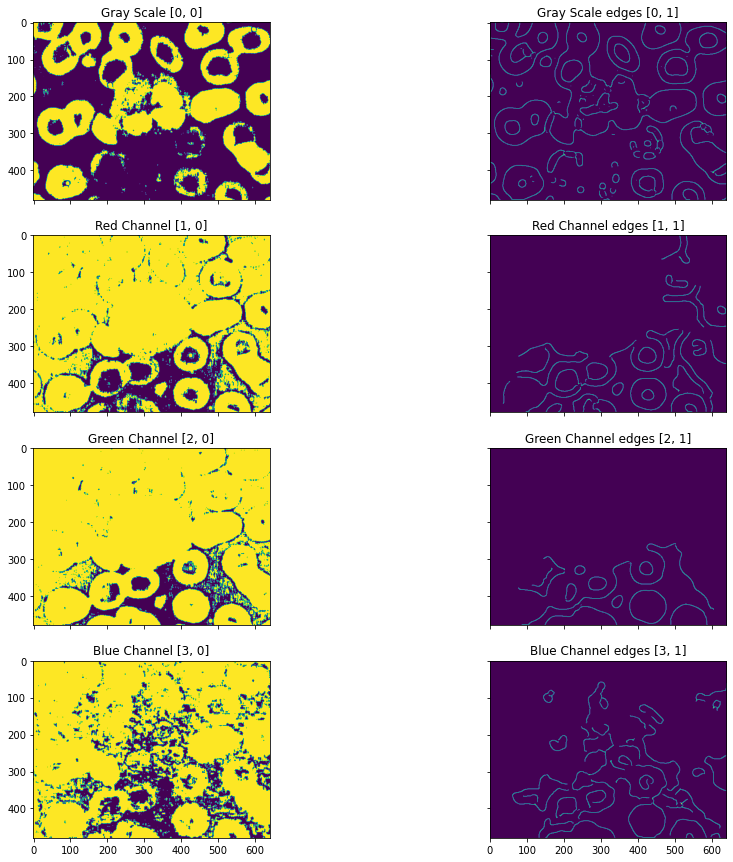

In [14]:

fig, axs = plt.subplots(4, 2, figsize=(15,15))
axs[0, 0].imshow(img_thrs_g)
axs[0, 0].set_title('Gray Scale [0, 0]')
axs[0, 1].imshow(edgs_1)
axs[0, 1].set_title('Gray Scale edges [0, 1]')
axs[1, 0].imshow(img_subt_r_thrs)
axs[1, 0].set_title('Red Channel [1, 0]')
axs[1, 1].imshow(edgs_2)
axs[1, 1].set_title('Red Channel edges [1, 1]')

axs[2, 0].imshow(img_subt_gr_thrs)
axs[2, 0].set_title('Green Channel [2, 0]')
axs[2, 1].imshow(edgs_3)
axs[2, 1].set_title('Green Channel edges [2, 1]')
axs[3, 0].imshow(img_subt_b_thrs)
axs[3, 0].set_title('Blue Channel [3, 0]')
axs[3, 1].imshow(edgs_4)
axs[3, 1].set_title('Blue Channel edges [3, 1]')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

## Conclusion: 
I'm going to analyse these experiments to choose the one that can solve better this problem

In [15]:
%autosave 10

Autosaving every 10 seconds
